___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

In this project, you must apply EDA processes for the development of predictive models. Handling outliers, domain knowledge and feature engineering will be challenges.

Also, this project aims to improve your ability to implement algorithms for Multi-Class Classification. Thus, you will have the opportunity to implement many algorithms commonly used for Multi-Class Classification problems.

Before diving into the project, please take a look at the determines and tasks.

# Determines

The 2012 US Army Anthropometric Survey (ANSUR II) was executed by the Natick Soldier Research, Development and Engineering Center (NSRDEC) from October 2010 to April 2012 and is comprised of personnel representing the total US Army force to include the US Army Active Duty, Reserves, and National Guard. In addition to the anthropometric and demographic data described below, the ANSUR II database also consists of 3D whole body, foot, and head scans of Soldier participants. These 3D data are not publicly available out of respect for the privacy of ANSUR II participants. The data from this survey are used for a wide range of equipment design, sizing, and tariffing applications within the military and has many potential commercial, industrial, and academic applications.

The ANSUR II working databases contain 93 anthropometric measurements which were directly measured, and 15 demographic/administrative variables explained below. The ANSUR II Male working database contains a total sample of 4,082 subjects. The ANSUR II Female working database contains a total sample of 1,986 subjects.


DATA DICT:
https://data.world/datamil/ansur-ii-data-dictionary/workspace/file?filename=ANSUR+II+Databases+Overview.pdf

---

To achieve high prediction success, you must understand the data well and develop different approaches that can affect the dependent variable.

Firstly, try to understand the dataset column by column using pandas module. Do research within the scope of domain (body scales, and race characteristics) knowledge on the internet to get to know the data set in the fastest way. 

You will implement ***Logistic Regression, Support Vector Machine, XGBoost, Random Forest*** algorithms. Also, evaluate the success of your models with appropriate performance metrics.

At the end of the project, choose the most successful model and try to enhance the scores with ***SMOTE*** make it ready to deploy. Furthermore, use ***SHAP*** to explain how the best model you choose works.

# Tasks

#### 1. Exploratory Data Analysis (EDA)
- Import Libraries, Load Dataset, Exploring Data

    *i. Import Libraries*
    
    *ii. Ingest Data *
    
    *iii. Explore Data*
    
    *iv. Outlier Detection*
    
    *v.  Drop unnecessary features*

#### 2. Data Preprocessing
- Scale (if needed)
- Separete the data frame for evaluation purposes

#### 3. Multi-class Classification
- Import libraries
- Implement SVM Classifer
- Implement Decision Tree Classifier
- Implement Random Forest Classifer
- Implement XGBoost Classifer
- Compare The Models



# EDA
- Drop unnecessary colums
- Drop DODRace class if value count below 500 (we assume that our data model can't learn if it is below 500)

## Import Libraries
Besides Numpy and Pandas, you need to import the necessary modules for data visualization, data preprocessing, Model building and tuning.

*Note: Check out the course materials.*

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

## Ingest Data from links below and make a dataframe
- Soldiers Male : https://query.data.world/s/h3pbhckz5ck4rc7qmt2wlknlnn7esr
- Soldiers Female : https://query.data.world/s/sq27zz4hawg32yfxksqwijxmpwmynq

In [2]:
male = pd.read_csv("ANSUR II MALE Public.csv", sep=",", encoding='Latin-1')
#male = pd.read_csv('ANSUR II MALE Public.csv')
female = pd.read_csv("ANSUR II FEMALE Public.csv", sep=",", encoding='Latin-1')

## Explore Data

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
female.DODRace.value_counts()

1    975
2    656
3    239
4     71
6     25
5     20
Name: DODRace, dtype: int64

In [4]:
male.head().T

,0,1,2,3,4
subjectid,10027,10032,10033,10092,10093
abdominalextensiondepthsitting,266,233,287,234,250
acromialheight,1467,1395,1430,1347,1585
acromionradialelength,337,326,341,310,372
anklecircumference,222,220,230,230,247
axillaheight,1347,1293,1327,1239,1478
balloffootcircumference,253,245,256,262,267
balloffootlength,202,193,196,199,224
biacromialbreadth,401,394,427,401,435
bicepscircumferenceflexed,369,338,408,359,356


In [5]:
female.shape

(1986, 108)

In [6]:
male.shape

(4082, 108)

In [7]:
#We are combining both dataframes which have the same columns
data = pd.concat([male, female], axis = 0, ignore_index = True)
data.shape
#One additional column which means one column_name is different than the other

(6068, 109)

In [8]:
data.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Data columns (total 109 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   subjectid                       float64
 1   abdominalextensiondepthsitting  int64  
 2   acromialheight                  int64  
 3   acromionradialelength           int64  
 4   anklecircumference              int64  
 5   axillaheight                    int64  
 6   balloffootcircumference         int64  
 7   balloffootlength                int64  
 8   biacromialbreadth               int64  
 9   bicepscircumferenceflexed       int64  
 10  bicristalbreadth                int64  
 11  bideltoidbreadth                int64  
 12  bimalleolarbreadth              int64  
 13  bitragionchinarc                int64  
 14  bitragionsubmandibulararc       int64  
 15  bizygomaticbreadth              int64  
 16  buttockcircumference            int64  
 17  buttockdepth                    

In [9]:
data.isnull().sum().any()

True

In [10]:
data.duplicated().sum()

0

1    3792
2    1298
3     679
4     188
6      59
5      49
8       3
Name: DODRace, dtype: int64


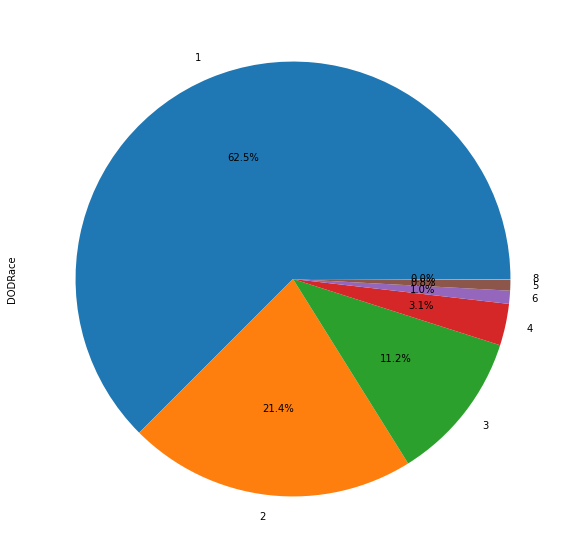

In [11]:
#Our target value is race=hispanic. We are trying to estimate if he/she is hispanic or not
print(data['DODRace'].value_counts())
data['DODRace'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10,10));
# 1: White, 2:Black, 3:Hispanic

In [12]:
# Dropping Null Data, getting the list of columns which have more than 0 null values.
drop_list = []
for col in data:
    if data[col].isnull().sum()>0:
        print(f"{col} = {data[col].isnull().sum()}")
        drop_list.append(col)
        
drop_list

subjectid = 1986
Ethnicity = 4647
SubjectId = 4082


['subjectid', 'Ethnicity', 'SubjectId']

In [13]:
data.drop(drop_list, axis=1, inplace = True)

In [14]:
data.isnull().sum()

abdominalextensiondepthsitting    0
acromialheight                    0
acromionradialelength             0
anklecircumference                0
axillaheight                      0
balloffootcircumference           0
balloffootlength                  0
biacromialbreadth                 0
bicepscircumferenceflexed         0
bicristalbreadth                  0
bideltoidbreadth                  0
bimalleolarbreadth                0
bitragionchinarc                  0
bitragionsubmandibulararc         0
bizygomaticbreadth                0
buttockcircumference              0
buttockdepth                      0
buttockheight                     0
buttockkneelength                 0
buttockpopliteallength            0
calfcircumference                 0
cervicaleheight                   0
chestbreadth                      0
chestcircumference                0
chestdepth                        0
chestheight                       0
crotchheight                      0
crotchlengthomphalion       

In [15]:
data.shape

(6068, 106)

In [16]:
# to find how many unique values the "object features"="categorical Features" have
# Because we will use get_dummies for the categorical features
for col in data.select_dtypes("object"):
    print(f"{col} has {data[col].nunique()} unique values")

Gender has 2 unique values
Date has 253 unique values
Installation has 12 unique values
Component has 3 unique values
Branch has 3 unique values
PrimaryMOS has 285 unique values
SubjectsBirthLocation has 152 unique values
WritingPreference has 3 unique values


In [17]:
#Target column
data.DODRace.unique()

array([1, 2, 3, 4, 5, 6, 8], dtype=int64)

In [18]:
# We are mappping the exact names of the races
data["DODRace"] = data.DODRace.map({
    1:"White",
    2:"Black",
    3:"Hispanic",
    4:"Asian",
    5:"Native American",
    6:"Pacific Islander",
    8:"Other"
})

In [19]:
#The distribution of races in each component
data.groupby(["Component"])["DODRace"].value_counts(normalize=True)

Component            DODRace         
Army National Guard  White               0.685007
                     Black               0.184269
                     Hispanic            0.093427
                     Asian               0.022157
                     Native American     0.008863
                     Pacific Islander    0.006278
Army Reserve         White               0.518182
                     Black               0.236364
                     Hispanic            0.186364
                     Asian               0.040909
                     Pacific Islander    0.013636
                     Native American     0.004545
Regular Army         White               0.580573
                     Black               0.237898
                     Hispanic            0.122611
                     Asian               0.037898
                     Pacific Islander    0.012420
                     Native American     0.007643
                     Other               0.000955
Name: DODRac

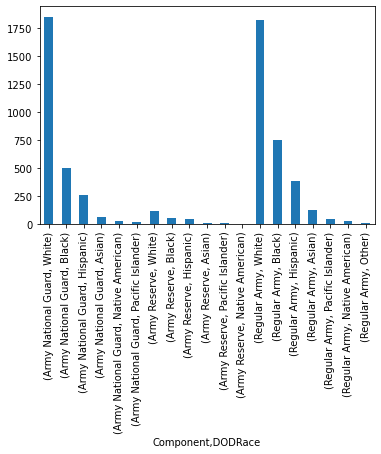

In [20]:
data.groupby(["Component"])["DODRace"].value_counts().plot(kind="bar");

In [21]:
data.groupby(["Component", "Branch"])["DODRace"].value_counts(normalize=True)

Component            Branch                  DODRace         
Army National Guard  Combat Arms             White               0.771995
                                             Black               0.097893
                                             Hispanic            0.091698
                                             Asian               0.022305
                                             Native American     0.011152
                                             Pacific Islander    0.004957
                     Combat Service Support  White               0.643509
                                             Black               0.218947
                                             Hispanic            0.099649
                                             Asian               0.023158
                                             Pacific Islander    0.007719
                                             Native American     0.007018
                     Combat Support          White

In [22]:
#We assume that these features are not important to predict the race
drop_list1 = [
    "Date", "Installation", "Component", "Branch", "PrimaryMOS", "Weightlbs", "Heightin"    
]
data.drop(drop_list1, axis=1, inplace = True)

In [23]:
data.shape

(6068, 99)

In [24]:
#This columns includes more subjective values which were given by the soldiers.
#In contrast the "DODRace" more objective and includes 7 kind of values.
data.SubjectNumericRace.value_counts()

1        3561
2        1026
3         541
31        160
51        126
8         116
4         109
21         60
6          59
41         46
61         35
23         34
28         26
251        20
18         18
5          18
25         14
351        10
38          9
35          8
64          8
62          8
63          7
42          7
231         6
43          5
235         4
218         3
651         2
641         2
2351        2
318         2
423         2
431         2
451         2
2518        2
425         1
4251        1
238         1
358         1
428         1
48          1
631         1
42351       1
Name: SubjectNumericRace, dtype: int64

In [25]:
data.drop("SubjectNumericRace", axis=1, inplace = True)
data.shape

(6068, 98)

In [26]:
data.DODRace.value_counts()

White               3792
Black               1298
Hispanic             679
Asian                188
Pacific Islander      59
Native American       49
Other                  3
Name: DODRace, dtype: int64

In [27]:
data = data[(data["DODRace"] == "White") | (data["DODRace"] == "Black") |
           (data["DODRace"] == "Hispanic")] 
#Selecting the target values which has more than 500 samples

In [28]:
data.shape

(5769, 98)

In [29]:
#It is good to reset the index at the end of dropping 
data.reset_index(drop=True, inplace = True) # drop=True--> deletes the previous indexes

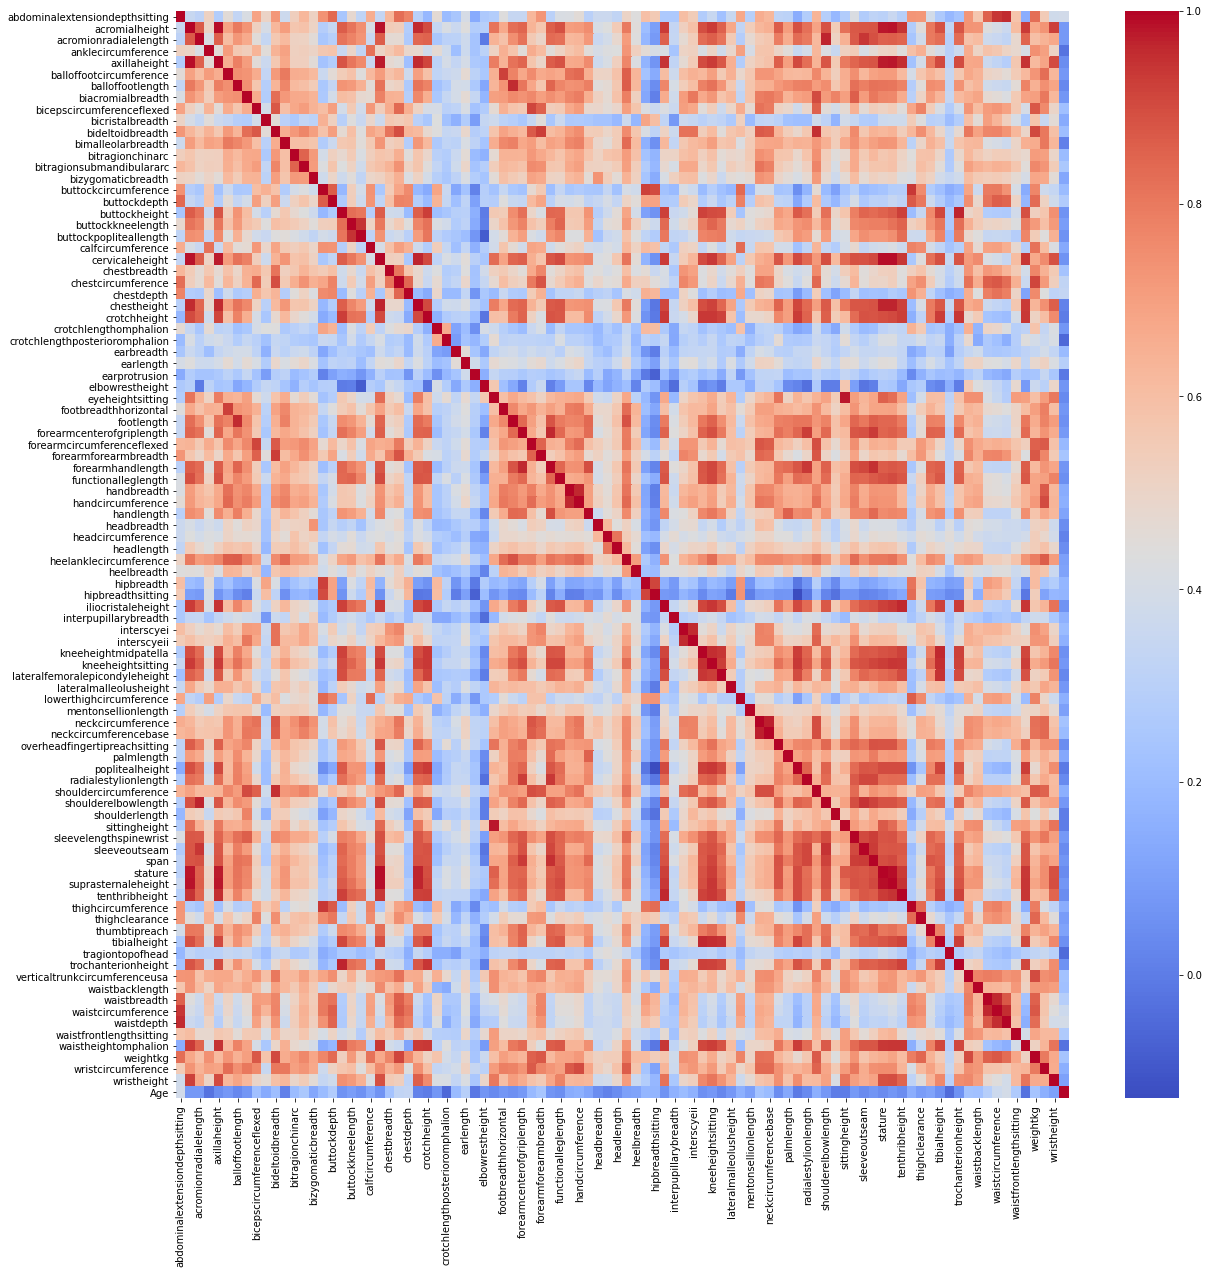

In [30]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), cmap = "coolwarm");

#Multicollinarity is not a problem with decision_tree based models.

In [31]:
#Multicollinarity is a problem with feature_importance: One affect the other and can result bad feature_importance problems.

# DATA Preprocessing
- In this step we divide our data to X(Features) and y(Target) then ,
- To train and evaluation purposes we create train and test sets,
- Lastly, scale our data if features not in same scale. Why?

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
#We use get_dummies for categorical features to use in Logistic regression
X = data.drop("DODRace", axis=1)
X = pd.get_dummies(data=X, drop_first=True)  # Convert categorical data
y = data.DODRace

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 42, stratify = y)
#stratify = y --> is used to have a balanced ( equal proportion) data spread within train and test data

In [35]:
print( "Train features shape : ", X_train.shape)
print( "Train target shape   : ", y_train.shape)
print( "Test features shape  : ", X_test.shape)
print( "Test target shape    : ", y_test.shape)

Train features shape :  (4615, 232)
Train target shape   :  (4615,)
Test features shape  :  (1154, 232)
Test target shape    :  (1154,)


# Modelling
- Fit the model with train dataset
- Get predict from vanilla model on both train and test sets to examine if there is over/underfitting   
- Apply GridseachCV for both hyperparemeter tuning and sanity test of our model.
- Use hyperparameters that you find from gridsearch and make final prediction and evaluate the result according to chosen metric.

## 1. Logistic model

### Vanilla Logistic Model

In [36]:
#To evaluate the results of the models.
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("---------")
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("---------")

In [37]:
# Until now **Class_weight = "balanced" is the best solution for imbalance data
# It supplies balanced target classes, 
from sklearn.pipeline import Pipeline
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
pipe_log_model = Pipeline(steps=operations)

In [38]:
pipe_log_model.fit(X_train,y_train)
eval_metric(pipe_log_model, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

---------
Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  356 2611]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615

---------


In [39]:
# Since our target is multiclass:
# If we want to slect one of the multiclasses ( Here:Hispanic) make_scorer supplies this for us.
scoring = {"f1_Hispanic" : make_scorer(f1_score, average = None, labels =["Hispanic"]),
           "precision_Hispanic" : make_scorer(precision_score, average = None, labels =["Hispanic"]),
           "recall_Hispanic" : make_scorer(recall_score, average = None, labels =["Hispanic"])}

In [40]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.604013
test_precision_Hispanic    0.498576
test_recall_Hispanic       0.769933
dtype: float64

### Logistic Model GridsearchCV

In [41]:
# Since we could assign only one metric in Gridsearch
#And we want to get better results for Hispanic class we selected Recall
recall_Hispanic =  make_scorer(recall_score, average=None, labels=["Hispanic"])

In [42]:
param_grid = {
    "log__C": [1, 5, 10],
    'log__penalty': ["l1", "l2"], # Ridge, Lasso
    'log__solver': ['liblinear', 'lbfgs'],
}

In [43]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

log_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3, # To report first n results of the grids-combinations: To see the log-records
                              scoring=recall_Hispanic,
                              n_jobs=-1, cv=5)

In [44]:
log_model_grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('log',
                                        LogisticRegression(class_weight='balanced',
                                                           max_iter=10000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'log__C': [1, 5, 10], 'log__penalty': ['l1', 'l2'],
                         'log__solver': ['liblinear', 'lbfgs']},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [45]:
log_model_grid.best_params_

{'log__C': 1, 'log__penalty': 'l2', 'log__solver': 'lbfgs'}

In [46]:
log_model_grid.best_score_

0.7640672782874617

In [47]:
eval_metric(log_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[238  12  10]
 [  6 107  23]
 [ 13  93 652]]
              precision    recall  f1-score   support

       Black       0.93      0.92      0.92       260
    Hispanic       0.50      0.79      0.61       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.85      0.81      1154
weighted avg       0.89      0.86      0.87      1154

---------
Train_Set
[[ 971   36   31]
 [  21  454   68]
 [  67  356 2611]]
              precision    recall  f1-score   support

       Black       0.92      0.94      0.93      1038
    Hispanic       0.54      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615

---------


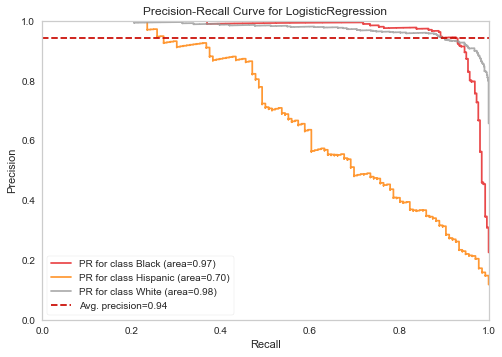

In [48]:
from yellowbrick.classifier import PrecisionRecallCurve

operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [49]:
viz.score_#["Hispanic"]

{'Black': 0.9719016028220796,
 'Hispanic': 0.7004272329885641,
 'White': 0.9758720225982598,
 'micro': 0.9418029626240616}

In [50]:
y_pred = log_model_grid.predict(X_test)

log_AP = viz.score_["Hispanic"]
log_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
log_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [51]:
# We could iterate on the other hyperparameters:
# For example we could try liblinear as solver. Because it is adviced for small datasets.

## 2. SVC

### Vanilla SVC model 
- Classifier model of SVM

In [52]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
pipe_svc_model = Pipeline(steps=operations_svc)

In [53]:
pipe_svc_model.fit(X_train, y_train)

eval_metric(pipe_svc_model, X_train, y_train, X_test, y_test)

Test_Set
[[235  15  10]
 [  6 105  25]
 [ 10 104 644]]
              precision    recall  f1-score   support

       Black       0.94      0.90      0.92       260
    Hispanic       0.47      0.77      0.58       136
       White       0.95      0.85      0.90       758

    accuracy                           0.85      1154
   macro avg       0.78      0.84      0.80      1154
weighted avg       0.89      0.85      0.86      1154

---------
Train_Set
[[ 957   39   42]
 [  23  444   76]
 [  61  419 2554]]
              precision    recall  f1-score   support

       Black       0.92      0.92      0.92      1038
    Hispanic       0.49      0.82      0.61       543
       White       0.96      0.84      0.90      3034

    accuracy                           0.86      4615
   macro avg       0.79      0.86      0.81      4615
weighted avg       0.89      0.86      0.87      4615

---------


In [54]:
model = Pipeline(steps=operations_svc)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.579695
test_precision_Hispanic    0.466467
test_recall_Hispanic       0.769966
dtype: float64

###  SVC Model GridsearchCV

In [55]:
# The most important hyperparameters of SVM are C, gamma and kernel
param_grid = {
    'svc__C': [1,2,3], # Defines soft/hard 
    'svc__gamma': ["scale", "auto", 1, 0.1, 0.01] # Defines the shape 
}

In [56]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(class_weight="balanced",random_state=42))]
model = Pipeline(steps=operations_svc)

svm_model_grid = GridSearchCV(model,
                              param_grid,
                              verbose=3,
                              scoring=recall_Hispanic,
                              n_jobs=-1)

In [57]:
svm_model_grid.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


GridSearchCV(estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('svc',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svc__C': [1, 2, 3],
                         'svc__gamma': ['scale', 'auto', 1, 0.1, 0.01]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [58]:
svm_model_grid.best_params_

{'svc__C': 2, 'svc__gamma': 'scale'}

In [59]:
svm_model_grid.best_score_

0.7807339449541285

In [60]:
eval_metric(svm_model_grid, X_train, y_train, X_test, y_test)

Test_Set
[[237  15   8]
 [  6 107  23]
 [  7  97 654]]
              precision    recall  f1-score   support

       Black       0.95      0.91      0.93       260
    Hispanic       0.49      0.79      0.60       136
       White       0.95      0.86      0.91       758

    accuracy                           0.86      1154
   macro avg       0.80      0.85      0.81      1154
weighted avg       0.90      0.86      0.88      1154

---------
Train_Set
[[ 969   30   39]
 [  19  455   69]
 [  49  372 2613]]
              precision    recall  f1-score   support

       Black       0.93      0.93      0.93      1038
    Hispanic       0.53      0.84      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.81      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615

---------


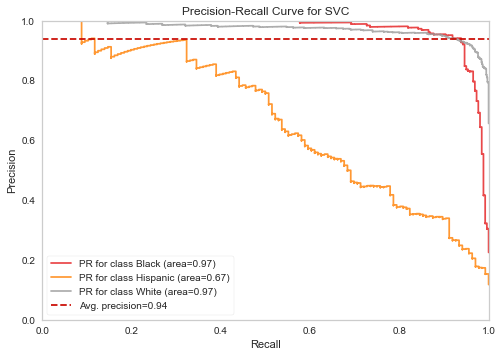

In [61]:
operations_svc = [("scaler", MinMaxScaler()), ("svc", SVC(C=2, class_weight="balanced",random_state=101))]
model = Pipeline(steps=operations_svc)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [62]:
y_pred = svm_model_grid.predict(X_test)

svc_AP = viz.score_["Hispanic"]
svc_f1 = f1_score(y_test, y_pred, average=None, labels=["Hispanic"])
svc_recall = recall_score(y_test, y_pred, average=None, labels=["Hispanic"])

In [63]:
# Until now we used SVM and Logistic Regression. For these models we use get_dummies to convert the categorical features.
# However after this level, for tree based models we will use ordinalEncoder for categorical features.


## 3. RF

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
X2 = data.drop("DODRace",axis=1)
y = data.DODRace

In [66]:
cat = X2.select_dtypes("object").columns
cat

Index(['Gender', 'SubjectsBirthLocation', 'WritingPreference'], dtype='object')

In [67]:
enc = OrdinalEncoder()
X2[cat] = enc.fit_transform(X2[cat])
X2.head().T

,0,1,2,3,4
abdominalextensiondepthsitting,266.0,233.0,287.0,234.0,250.0
acromialheight,1467.0,1395.0,1430.0,1347.0,1585.0
acromionradialelength,337.0,326.0,341.0,310.0,372.0
anklecircumference,222.0,220.0,230.0,230.0,247.0
axillaheight,1347.0,1293.0,1327.0,1239.0,1478.0
balloffootcircumference,253.0,245.0,256.0,262.0,267.0
balloffootlength,202.0,193.0,196.0,199.0,224.0
biacromialbreadth,401.0,394.0,427.0,401.0,435.0
bicepscircumferenceflexed,369.0,338.0,408.0,359.0,356.0
bicristalbreadth,274.0,257.0,261.0,262.0,263.0


In [68]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.2, random_state=42, stratify =y)

In [69]:
print("Train features shape : ", X_train2.shape)
print("Train target shape   : ", y_train2.shape)
print("Test features shape  : ", X_test2.shape)
print("Test target shape    : ", y_test2.shape)

Train features shape :  (4615, 97)
Train target shape   :  (4615,)
Test features shape  :  (1154, 97)
Test target shape    :  (1154,)


### Vanilla RF Model

In [70]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)

In [71]:
rf_model.fit(X_train2, y_train2)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [72]:
eval_metric(rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[182   1  77]
 [  7   5 124]
 [  8   1 749]]
              precision    recall  f1-score   support

       Black       0.92      0.70      0.80       260
    Hispanic       0.71      0.04      0.07       136
       White       0.79      0.99      0.88       758

    accuracy                           0.81      1154
   macro avg       0.81      0.57      0.58      1154
weighted avg       0.81      0.81      0.76      1154

---------
Train_Set
[[1038    0    0]
 [   0  543    0]
 [   0    0 3034]]
              precision    recall  f1-score   support

       Black       1.00      1.00      1.00      1038
    Hispanic       1.00      1.00      1.00       543
       White       1.00      1.00      1.00      3034

    accuracy                           1.00      4615
   macro avg       1.00      1.00      1.00      4615
weighted avg       1.00      1.00      1.00      4615

---------


In [73]:
# Cross validation to compare with above results
model = RandomForestClassifier(class_weight="balanced", random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.082332
test_precision_Hispanic    0.725000
test_recall_Hispanic       0.044108
dtype: float64

### RF Model GridsearchCV

In [74]:
param_grid = {'n_estimators':[50,100, 200],
             'max_depth':[2,3,5,10]} #'min_samples_split':[18,20,22], 'max_features': ['auto', None, 15, 20]
             

In [75]:
rf_model = RandomForestClassifier(class_weight="balanced", random_state=42)
rf_grid_model = GridSearchCV(rf_model,
                             param_grid,
                             verbose=3,
                             scoring=recall_Hispanic,
                             n_jobs=-1)

In [76]:
rf_grid_model.fit(X_train2,y_train2)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring=make_scorer(recall_score, average=None, labels=['Hispanic']),
             verbose=3)

In [77]:
rf_grid_model.best_params_

{'max_depth': 2, 'n_estimators': 100}

In [78]:
rf_grid_model.best_score_

0.6058273870200476

In [79]:
eval_metric(rf_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[180  56  24]
 [ 14  86  36]
 [ 63 299 396]]
              precision    recall  f1-score   support

       Black       0.70      0.69      0.70       260
    Hispanic       0.20      0.63      0.30       136
       White       0.87      0.52      0.65       758

    accuracy                           0.57      1154
   macro avg       0.59      0.62      0.55      1154
weighted avg       0.75      0.57      0.62      1154

---------
Train_Set
[[ 725  198  115]
 [  48  342  153]
 [ 248 1080 1706]]
              precision    recall  f1-score   support

       Black       0.71      0.70      0.70      1038
    Hispanic       0.21      0.63      0.32       543
       White       0.86      0.56      0.68      3034

    accuracy                           0.60      4615
   macro avg       0.60      0.63      0.57      4615
weighted avg       0.75      0.60      0.64      4615

---------


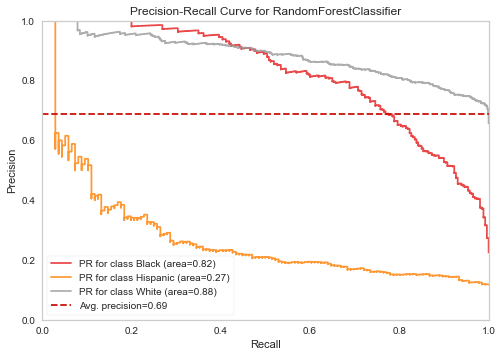

In [80]:
model = RandomForestClassifier(class_weight="balanced", random_state=42, max_depth=2, n_estimators = 100)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [81]:
y_pred = rf_grid_model.predict(X_test2)

rf_AP = viz.score_["Hispanic"]
rf_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
rf_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

## 4. XGBoost

### Vanilla XGBoost Model

In [82]:
pip install xgboost==0.90

Note: you may need to restart the kernel to use updated packages.


In [83]:
import xgboost as xgb

xgb.__version__

'0.90'

In [84]:
xgb_model = XGBClassifier(random_state=42)

In [85]:
# We need to make multi-level computation for XGBosst to make class_weight
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train2)
classes_weights

array([0.50703142, 0.50703142, 0.50703142, ..., 0.50703142, 0.50703142,
       0.50703142])

In [86]:
comp = pd.DataFrame(classes_weights)

comp["label"] = y_train2.reset_index(drop=True)
comp.groupby("label")[0].value_counts()

label     0       
Black     1.482017    1038
Hispanic  2.833026     543
White     0.507031    3034
Name: 0, dtype: int64

In [87]:
xgb_model.fit(X_train2,y_train2, sample_weight=classes_weights)
# weight parameter in XGBoost is per instance not per class. Therefore, we need to assign the weight of each class to its instances, which is the same thing.

XGBClassifier(objective='multi:softprob', random_state=42)

In [88]:
eval_metric(xgb_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[225  18  17]
 [ 10  93  33]
 [ 26  96 636]]
              precision    recall  f1-score   support

       Black       0.86      0.87      0.86       260
    Hispanic       0.45      0.68      0.54       136
       White       0.93      0.84      0.88       758

    accuracy                           0.83      1154
   macro avg       0.75      0.80      0.76      1154
weighted avg       0.86      0.83      0.84      1154

---------
Train_Set
[[ 977   23   38]
 [  20  468   55]
 [  96  314 2624]]
              precision    recall  f1-score   support

       Black       0.89      0.94      0.92      1038
    Hispanic       0.58      0.86      0.69       543
       White       0.97      0.86      0.91      3034

    accuracy                           0.88      4615
   macro avg       0.81      0.89      0.84      4615
weighted avg       0.90      0.88      0.89      4615

---------


In [89]:
model = XGBClassifier(random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = scoring, cv = 10, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.498627
test_precision_Hispanic    0.424347
test_recall_Hispanic       0.607710
dtype: float64

### XGBoost Model GridsearchCV

In [90]:
param_grid = {"n_estimators":[50, 100],
              'max_depth':[1,2],
              "learning_rate": [0.1, 0.3],
              "subsample":[0.8, 1],
              "colsample_bytree":[0.8, 1]}

In [91]:
xgb_model = XGBClassifier(random_state=42)
xgb_grid_model = GridSearchCV(xgb_model, 
                              param_grid, 
                              scoring=recall_Hispanic, 
                              n_jobs = -1, 
                              verbose = 2).fit(X_train2, y_train2,sample_weight=classes_weights)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


In [92]:
xgb_grid_model.best_params_

{'colsample_bytree': 0.8,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 100,
 'subsample': 1}

In [93]:
xgb_grid_model.best_score_

0.6278967040434931

In [94]:
eval_metric(xgb_grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[224  22  14]
 [  9  96  31]
 [ 40 130 588]]
              precision    recall  f1-score   support

       Black       0.82      0.86      0.84       260
    Hispanic       0.39      0.71      0.50       136
       White       0.93      0.78      0.85       758

    accuracy                           0.79      1154
   macro avg       0.71      0.78      0.73      1154
weighted avg       0.84      0.79      0.80      1154

---------
Train_Set
[[ 925   56   57]
 [  42  406   95]
 [ 147  471 2416]]
              precision    recall  f1-score   support

       Black       0.83      0.89      0.86      1038
    Hispanic       0.44      0.75      0.55       543
       White       0.94      0.80      0.86      3034

    accuracy                           0.81      4615
   macro avg       0.74      0.81      0.76      4615
weighted avg       0.86      0.81      0.83      4615

---------


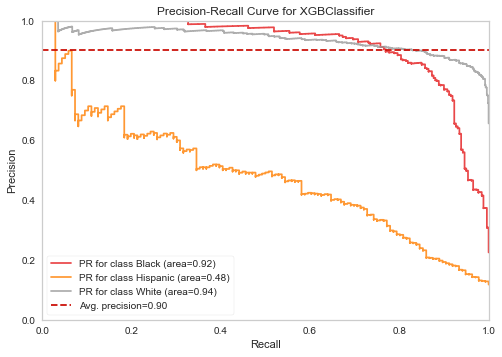

In [95]:
model = XGBClassifier(learning_rate=0.3, max_depth=1,
              random_state=101, subsample=0.8)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1",
    sample_weight=classes_weights
)
viz.fit(X_train2, y_train2)
viz.score(X_test2, y_test2)
viz.show();

In [96]:
y_pred = xgb_grid_model.predict(X_test2)

xgb_AP = viz.score_["Hispanic"]
xgb_f1 = f1_score(y_test2, y_pred, average=None, labels=["Hispanic"])
xgb_recall = recall_score(y_test2, y_pred, average=None, labels=["Hispanic"])

### Comparing Models

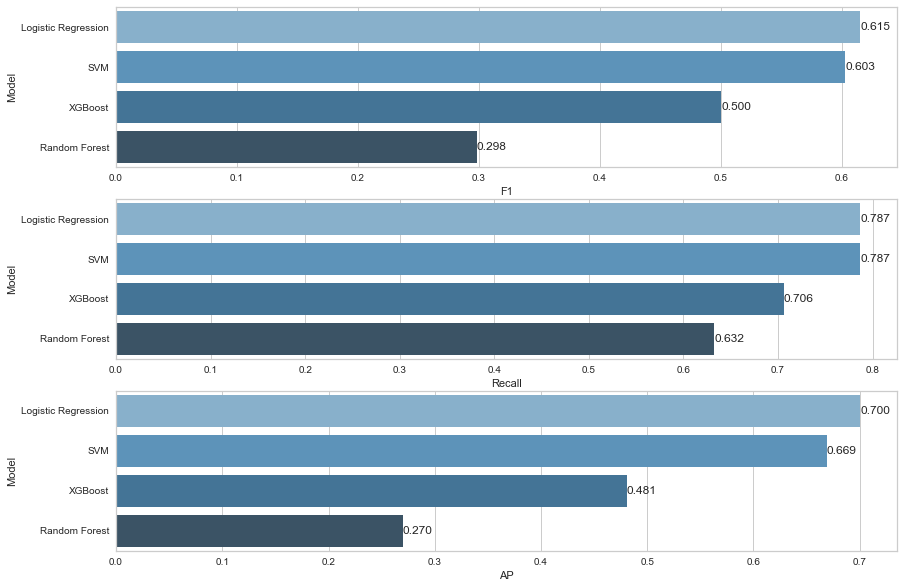

In [97]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "SVM",  "Random Forest", "XGBoost"],
                        "F1": [log_f1[0], svc_f1[0], rf_f1[0], xgb_f1[0]],
                        "Recall": [log_recall[0], svc_recall[0], rf_recall[0], xgb_recall[0]],
                        "AP": [log_AP, svc_AP, rf_AP, xgb_AP]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="AP", ascending=False)
ax=sns.barplot(x="AP", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

---
---

---
---

# SMOTE
https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

##  Smote implement

In [98]:
# A new method to fight with imbalance data like class_weight
# It creates syntetic data to the less part(Oversampling), or deletes data with downsampling
pip install imblearn

SyntaxError: invalid syntax (<ipython-input-98-6f0d7fc6afb7>, line 3)

In [100]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [101]:
over = SMOTE()
X_over, y_over = over.fit_resample(X_train, y_train)

In [102]:
X_over.shape

(9102, 232)

In [103]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [104]:
#Oversampling add new syntetic data to black and Hispanic to have balanced data
y_over.value_counts()

Black       3034
White       3034
Hispanic    3034
Name: DODRace, dtype: int64

In [105]:
under = RandomUnderSampler()
X_under, y_under = under.fit_resample(X_train, y_train)

In [106]:
X_under.shape

(1629, 232)

In [107]:
#Undersampling deletes data from black and white to have balanced data
y_under.value_counts()

Hispanic    543
White       543
Black       543
Name: DODRace, dtype: int64

In [108]:
# We would also define thenumbers via strategy
over = SMOTE(sampling_strategy={"Hispanic": 1000})
under = RandomUnderSampler(sampling_strategy={"White": 2500})

In [109]:
X_resampled_over, y_resampled_over = over.fit_resample(X_train, y_train)

In [110]:
y_resampled_over.value_counts()

White       3034
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [111]:
X_resampled_under, y_resampled_under = under.fit_resample(X_train, y_train) #X_resampled_over, y_resampled_over

In [112]:
y_resampled_under.value_counts()

White       2500
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

In [113]:
# we are configuring our pipeline steps
steps = [('o', over), ('u', under)]

# create a pipeline that will automatically apply over and under
# sampling in order to steps that we created.
pipeline = imbpipeline(steps=steps)

# we will create new data over X_train and y_train.
# We simply delete some of our samples if its race "white" and we add synthetic samples to "hispanics".
X_resampled, y_resampled = pipeline.fit_resample(X_train, y_train)

In [114]:
y_resampled.value_counts()

White       2500
Black       1038
Hispanic    1000
Name: DODRace, dtype: int64

In [115]:
y_train.value_counts()

White       3034
Black       1038
Hispanic     543
Name: DODRace, dtype: int64

## LogReg Over/Under Sampling

#### what does the smote pipeline do?

smote_pipeline.fit(X_train, y_train) --> over.fit_resample(X_train) --> under.fit_resample(X_train_over)

                                     --> scaler.fit_transform(X_train_over_under), log_model.fit(X_train_over_under_scaled, y_train)


for predict, over and under sumpling algortims do nothing.

smote_pipeline.predict(X_test)       --> scaler.transform(X_test) --> log_model.predict(X_test_scaled)

In [116]:
operations = [('o', over), ('u', under), ("scaler", MinMaxScaler()), 
              ("log", LogisticRegression(max_iter=10000,random_state=101))]

In [117]:
smote_pipeline = imbpipeline(steps=operations)

In [118]:
smote_pipeline.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={'Hispanic': 1000})),
                ('u', RandomUnderSampler(sampling_strategy={'White': 2500})),
                ('scaler', MinMaxScaler()),
                ('log', LogisticRegression(max_iter=10000, random_state=101))])

In [119]:
eval_metric(smote_pipeline, X_train, y_train, X_test, y_test)

Test_Set
[[236  13  11]
 [  4  90  42]
 [  5  36 717]]
              precision    recall  f1-score   support

       Black       0.96      0.91      0.93       260
    Hispanic       0.65      0.66      0.65       136
       White       0.93      0.95      0.94       758

    accuracy                           0.90      1154
   macro avg       0.85      0.84      0.84      1154
weighted avg       0.90      0.90      0.90      1154

---------
Train_Set
[[ 951   21   66]
 [  25  344  174]
 [  31  124 2879]]
              precision    recall  f1-score   support

       Black       0.94      0.92      0.93      1038
    Hispanic       0.70      0.63      0.67       543
       White       0.92      0.95      0.94      3034

    accuracy                           0.90      4615
   macro avg       0.86      0.83      0.84      4615
weighted avg       0.90      0.90      0.90      4615

---------


In [120]:
model = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.618567
test_precision_Hispanic    0.654231
test_recall_Hispanic       0.589259
dtype: float64

#  SHAP

https://towardsdatascience.com/shap-explain-any-machine-learning-model-in-python-24207127cad7

In [121]:
#It comes from game_theory
pip install shap

SyntaxError: invalid syntax (<ipython-input-121-f9db15241611>, line 2)

In [123]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [124]:
#Since our best model is logistic regression, we are working on that
model_shap = LogisticRegression(class_weight='balanced',max_iter=10000, random_state=101, penalty="l1", solver='saga')
model_shap.fit(X_train_scaled, y_train)

LogisticRegression(class_weight='balanced', max_iter=10000, penalty='l1',
                   random_state=101, solver='saga')

In [125]:
eval_metric(model_shap, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[239  12   9]
 [  7 103  26]
 [ 16  93 649]]
              precision    recall  f1-score   support

       Black       0.91      0.92      0.92       260
    Hispanic       0.50      0.76      0.60       136
       White       0.95      0.86      0.90       758

    accuracy                           0.86      1154
   macro avg       0.79      0.84      0.80      1154
weighted avg       0.89      0.86      0.87      1154

---------
Train_Set
[[ 969   38   31]
 [  18  452   73]
 [  77  350 2607]]
              precision    recall  f1-score   support

       Black       0.91      0.93      0.92      1038
    Hispanic       0.54      0.83      0.65       543
       White       0.96      0.86      0.91      3034

    accuracy                           0.87      4615
   macro avg       0.80      0.88      0.83      4615
weighted avg       0.90      0.87      0.88      4615

---------


In [126]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000, random_state=42, penalty="l1", solver='saga'))]
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.602254
test_precision_Hispanic    0.500979
test_recall_Hispanic       0.760707
dtype: float64

### Shap values for all data

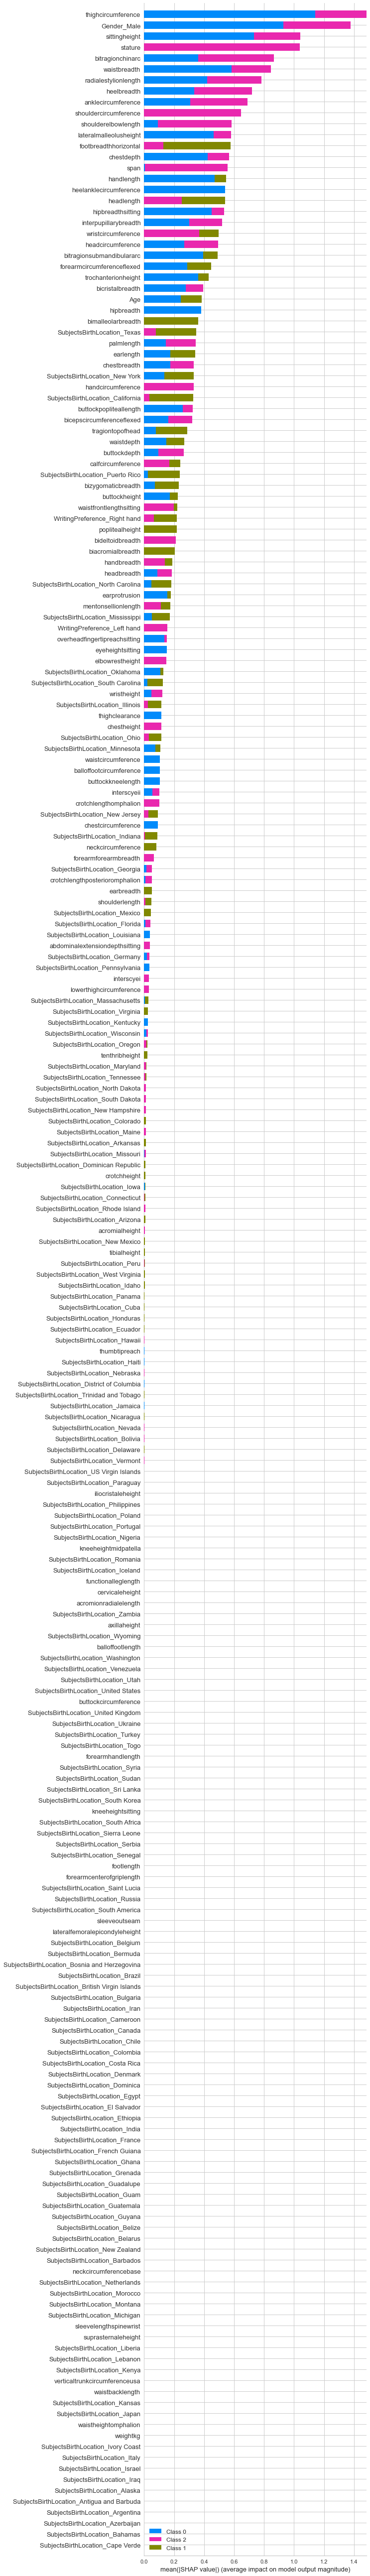

In [127]:
import shap

explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_test_scaled, max_display=300,feature_names = X.columns)
# We could see which features are important for each classes.

### SHAP for Feature Selection

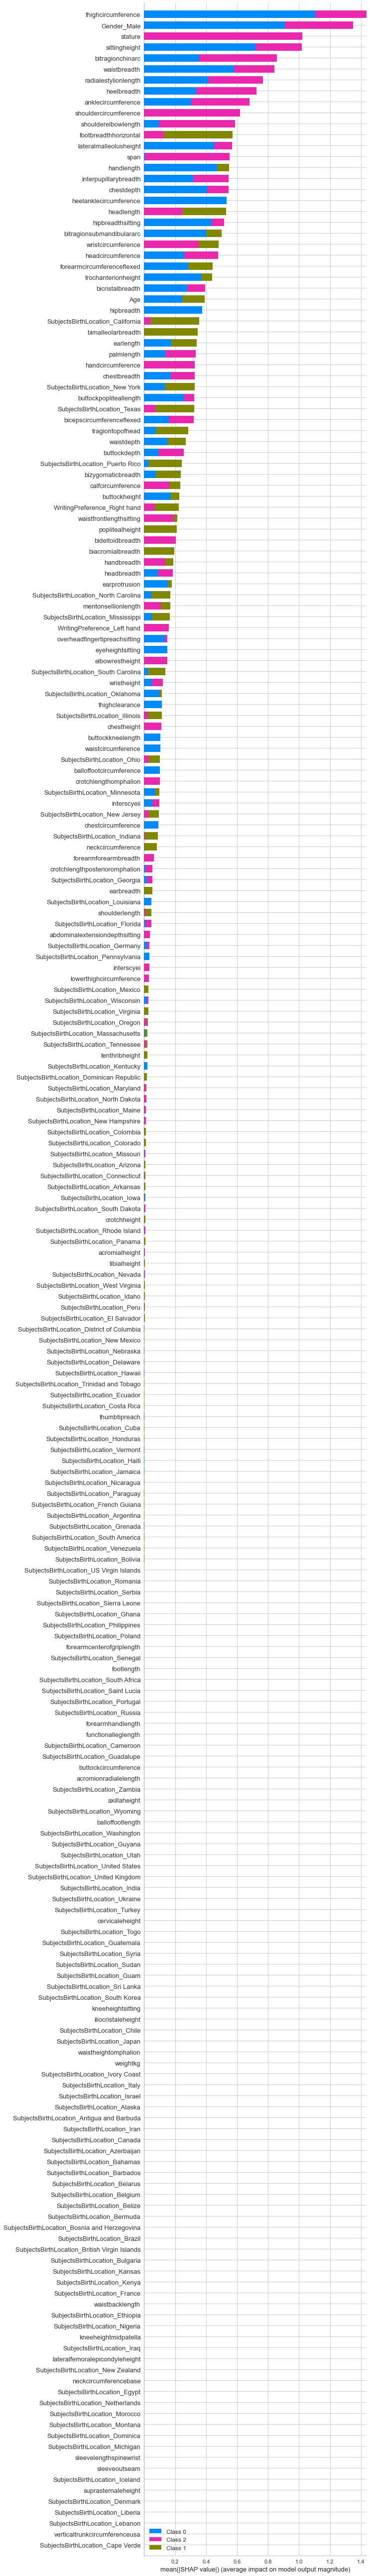

In [128]:
explainer = shap.Explainer(model_shap, X_train_scaled)

shap_values = explainer.shap_values(X_train_scaled)

shap.summary_plot(shap_values, X_train_scaled, max_display=300,feature_names = X.columns)

In [129]:
# Since these features are important for Hispanic class
hispanic = ["SubjectsBirthLocation",  'handlength',  'forearmcircumferenceflexed', "headlength", 'bitragionsubmandibulararc',
            'footbreadthhorizontal',  'bimalleolarbreadth', 'poplitealheight', 'waistdepth', 'WritingPreference', 'tragiontopofhead',
            'bideltoidbreadth', 'neckcircumferencebase', 'biacromialbreadth','buttockheight', 'buttockkneelength', 'earlength', 
            'axillaheight', "Age"]

In [130]:
X3 = data[hispanic]
X3 = pd.get_dummies(data=X3, drop_first=True)
y = data.DODRace

In [131]:
X3.shape #154 because of get_dummies

(5769, 154)

In [132]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.2, random_state=42, stratify =y)

In [133]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42,
                                                                    penalty="l1", solver='saga'))]
pipe_shap_model = Pipeline(steps=operations)

In [134]:
pipe_shap_model.fit(X_train3, y_train3)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    penalty='l1', random_state=42,
                                    solver='saga'))])

In [135]:
eval_metric(pipe_shap_model, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[206  21  33]
 [ 11 102  23]
 [ 79 120 559]]
              precision    recall  f1-score   support

       Black       0.70      0.79      0.74       260
    Hispanic       0.42      0.75      0.54       136
       White       0.91      0.74      0.81       758

    accuracy                           0.75      1154
   macro avg       0.67      0.76      0.70      1154
weighted avg       0.80      0.75      0.77      1154

---------
Train_Set
[[ 875   43  120]
 [  30  431   82]
 [ 391  500 2143]]
              precision    recall  f1-score   support

       Black       0.68      0.84      0.75      1038
    Hispanic       0.44      0.79      0.57       543
       White       0.91      0.71      0.80      3034

    accuracy                           0.75      4615
   macro avg       0.68      0.78      0.70      4615
weighted avg       0.80      0.75      0.76      4615

---------


In [136]:
model = Pipeline(steps=operations)

scores = cross_validate(model, X_train3, y_train3, scoring = scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Hispanic           0.544538
test_precision_Hispanic    0.429114
test_recall_Hispanic       0.747946
dtype: float64

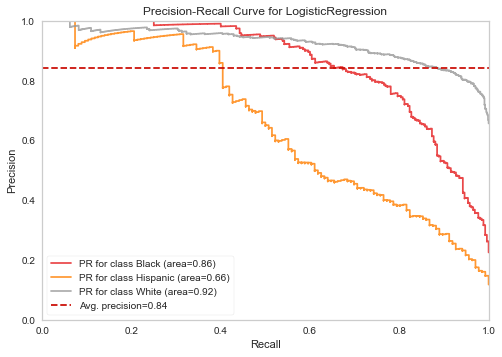

In [137]:
from yellowbrick.classifier import PrecisionRecallCurve
model = Pipeline(steps=operations)

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= ["Black", "Hispanic", "White"],
    cmap="Set1"
)
viz.fit(X_train3, y_train3)
viz.score(X_test3, y_test3)
viz.show();

# Before the Deployment 
- Choose the model that works best based on your chosen metric
- For final step, fit the best model with whole dataset to get better performance.
- And your model ready to deploy, dump your model and scaler.

In [138]:
operations = [("scaler", MinMaxScaler()), ("log", LogisticRegression(class_weight='balanced',max_iter=10000,random_state=42))]
final_model = Pipeline(steps=operations)

In [139]:
final_model.fit(X, y)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('log',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [140]:
# To check the model with the mean values of the features
mean_human = X.describe().loc["mean"]
mean_human

abdominalextensiondepthsitting                   247.254290
acromialheight                                  1408.630265
acromionradialelength                            328.071590
anklecircumference                               225.201768
axillaheight                                    1301.902583
balloffootcircumference                          244.408043
balloffootlength                                 195.118911
biacromialbreadth                                399.706015
bicepscircumferenceflexed                        341.663027
bicristalbreadth                                 274.903449
bideltoidbreadth                                 491.454845
bimalleolarbreadth                                72.335413
bitragionchinarc                                 324.962212
bitragionsubmandibulararc                        306.677760
bizygomaticbreadth                               139.529381
buttockcircumference                            1022.059456
buttockdepth                            

In [141]:
final_model.predict([mean_human])

array(['White'], dtype=object)

In [142]:
# To see the result od the 201th row.
y[201]

'Hispanic'

In [143]:
final_model.predict(X.loc[[201]])

array(['Hispanic'], dtype=object)

In [144]:
#Two new metrics for multiclass targets: Mathewws coeff and cohen_kappa_score
# The best result is 1

from sklearn.metrics import matthews_corrcoef

y_pred = final_model.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7895083688635766

In [145]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7808571214712837

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___